# Imports and set

In [1]:
import numpy as np
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import mlflow
import re
from collections import Counter
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\da4nik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataset = pd.read_csv('dataset/IMDB Dataset.csv')

# Preprocess

In [4]:
data = dataset.copy()

In [14]:
for i in data['review'][0:10]:
    print(f"- > {i}")

- > One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the

# Removing extra characters

In [5]:
def clean_review(text: str) -> str:
    text = text.lower()                # Перетворюємо в нижній регістр
    text = re.sub(r"<.*?>", " ", text) # Прибираємо HTML-теги (типу <br />, <br>, <...>)
    text = text.replace("\\'", "'").replace('\\"', '"').replace("\\n", " ")  # Прибираємо escape-послідовності типу \', \", \\n

    emoji_pattern = re.compile(  #  Прибираємо смайлики та юнікодні emoji
        "["                   
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002700-\U000027BF"  # other symbols
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(" ", text)

    text = text.replace("’", "'").replace("‘", "'") # нормалізуємо лапки

    text = re.sub(r"(?<![a-z0-9])'(?![a-z0-9])", " ", text)  # видаляємо апострофи, що НЕ між літерами/цифрами
    text = re.sub(r"\s+'(?=[a-z0-9])", " ", text)   # 'word → word
    text = re.sub(r"(?<=[a-z0-9])'\s+", " ", text)  # word' → word
    
    #text = re.sub(r"[^a-z0-9\s']", " ", text)       # Прибираємо все, крім букв, цифр, лапків і пробілів
    text = re.sub(r"[^a-z0-9\s'\.\,\!\?]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()        # Видаляємо повторювані пробіли

    return text

In [6]:
data["review_clean"] = data["review"].apply(clean_review)

In [7]:
for i in data['review_clean'][0:10]:
    print(f"- > {i}")

- > one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me. the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word. it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. i would say the main appeal of the show is due to the fact that it goes where other sh

# Stop words

In [8]:
stop_words = set(stopwords.words("english"))

In [9]:
def remove_stopwords(text: str) -> str:
    words = text.split()
    filtered_words = [w for w in words if w not in stop_words]
    return " ".join(filtered_words)

In [10]:
data["review_final"] = data["review_clean"].apply(remove_stopwords)

In [11]:
for i in data['review_final'][0:10]:
    print(f"- > {i}")

- > one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me. first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word. called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away. would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice crooked guards who'll sold nickel, inmates who'll kill order get a

# MLFlow tracking

In [12]:
mlflow.set_experiment("preprocessing");

2025/12/08 23:53:33 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/08 23:53:33 INFO mlflow.store.db.utils: Updating database tables
2025/12/08 23:53:33 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/08 23:53:33 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/08 23:53:33 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/08 23:53:33 INFO alembic.runtime.migration: Will assume non-transactional DDL.


In [13]:
processed_path = Path("dataset") / "IMDB_preprocessed_v2.csv"

In [ ]:
with mlflow.start_run(run_name="preprocess-v2"):
    mlflow.log_param("clean_html", True)
    mlflow.log_param("remove_emojis", True)
    mlflow.log_param("normalize_quotes", True)
    mlflow.log_param("remove_stopwords", True)
    mlflow.log_param("stopwords_source", "nltk_english")
    mlflow.log_param("keep_punctuation", ".,!?")
    
    n_rows_before = len(data)
    mlflow.log_metric("n_rows_before", n_rows_before)

    data["review_clean"] = data["review"].apply(clean_review)
    data["review_final"] = data["review_clean"].apply(remove_stopwords)

    n_rows_after = len(data)
    mlflow.log_metric("n_rows_after", n_rows_after)

    avg_len_before = dataset["review"].str.split().str.len().mean()
    avg_len_after = data["review_final"].str.split().str.len().mean()
    mlflow.log_metric("avg_tokens_before", avg_len_before)
    mlflow.log_metric("avg_tokens_after", avg_len_after)

    processed_path.parent.mkdir(parents=True, exist_ok=True)
    data.to_csv(processed_path, index=False)
    mlflow.log_artifact(str(processed_path))

# EDA

## Plot word frequency

In [59]:
positive_reviews = data[data["sentiment"] == "positive"]["review_final"]
negative_reviews = data[data["sentiment"] == "negative"]["review_final"]

In [60]:
def get_word_freq(series):
    all_words = " ".join(series).split()
    return Counter(all_words)

In [61]:
pos_freq = get_word_freq(positive_reviews).most_common(20)
neg_freq = get_word_freq(negative_reviews).most_common(20)

In [62]:
def plot_freq(freq_list, title):
    words, counts = zip(*freq_list)

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel("Слова")
    plt.ylabel("Частота")
    plt.tight_layout()
    plt.show()

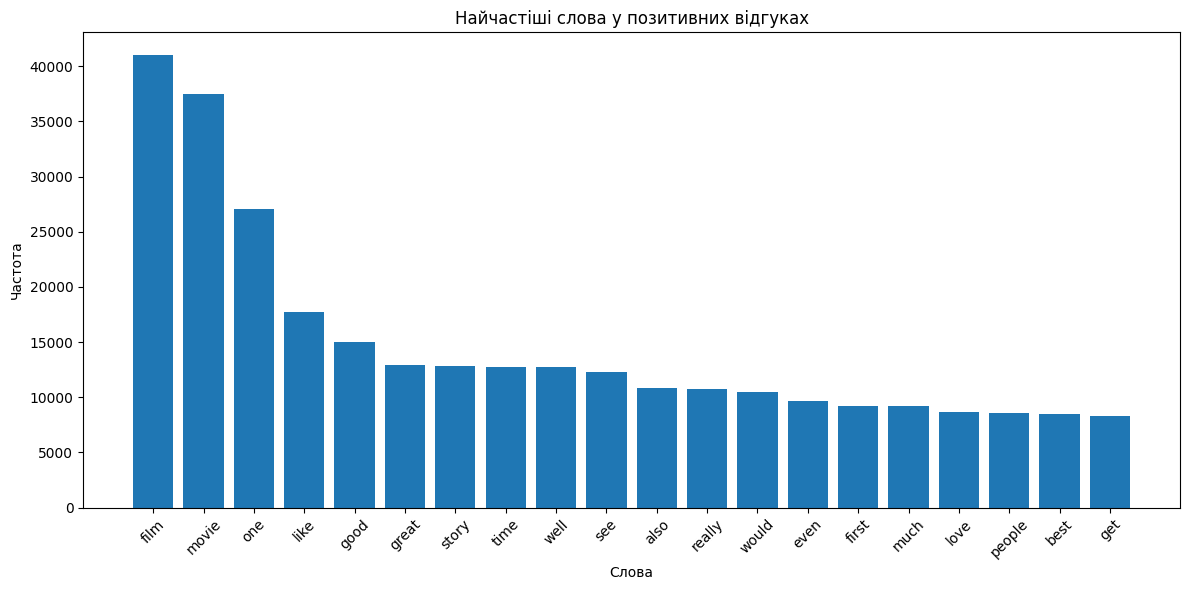

In [63]:
plot_freq(pos_freq, "Найчастіші слова у позитивних відгуках")

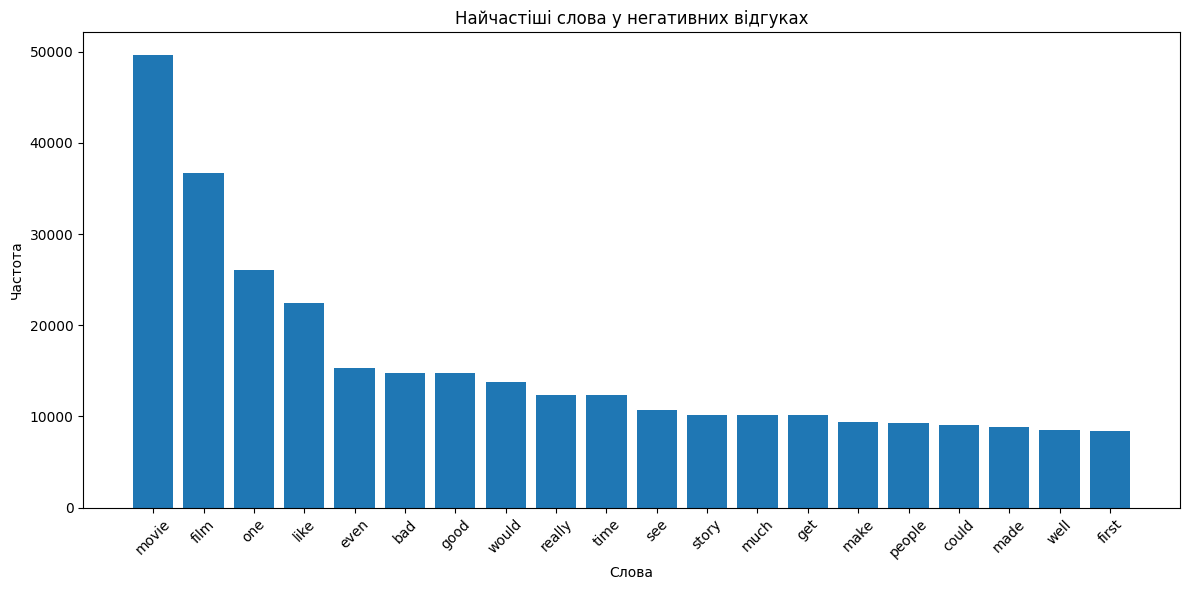

In [64]:
plot_freq(neg_freq, "Найчастіші слова у негативних відгуках")

Отже ми бачимо як характерні слова для позитивних і негативних так і ні (good, bad, best, great). Так і дуже багато спільни пов'язано з фільмами та контекстом дігуку на них.(film, movie)

## word frequency diff

In [67]:
pos_counter = get_word_freq(positive_reviews)
neg_counter = get_word_freq(negative_reviews)

In [68]:
pos_top100 = [w for w, c in pos_counter.most_common(100)]
neg_top100 = [w for w, c in neg_counter.most_common(100)]

In [69]:
pos_unique = set(pos_top100) - set(neg_top100)
neg_unique = set(neg_top100) - set(pos_top100)

In [70]:
pos_unique_top20 = [(w, pos_counter[w]) for w in pos_unique]
pos_unique_top20 = sorted(pos_unique_top20, key=lambda x: x[1], reverse=True)[:20]

neg_unique_top20 = [(w, neg_counter[w]) for w in neg_unique]
neg_unique_top20 = sorted(neg_unique_top20, key=lambda x: x[1], reverse=True)[:20]

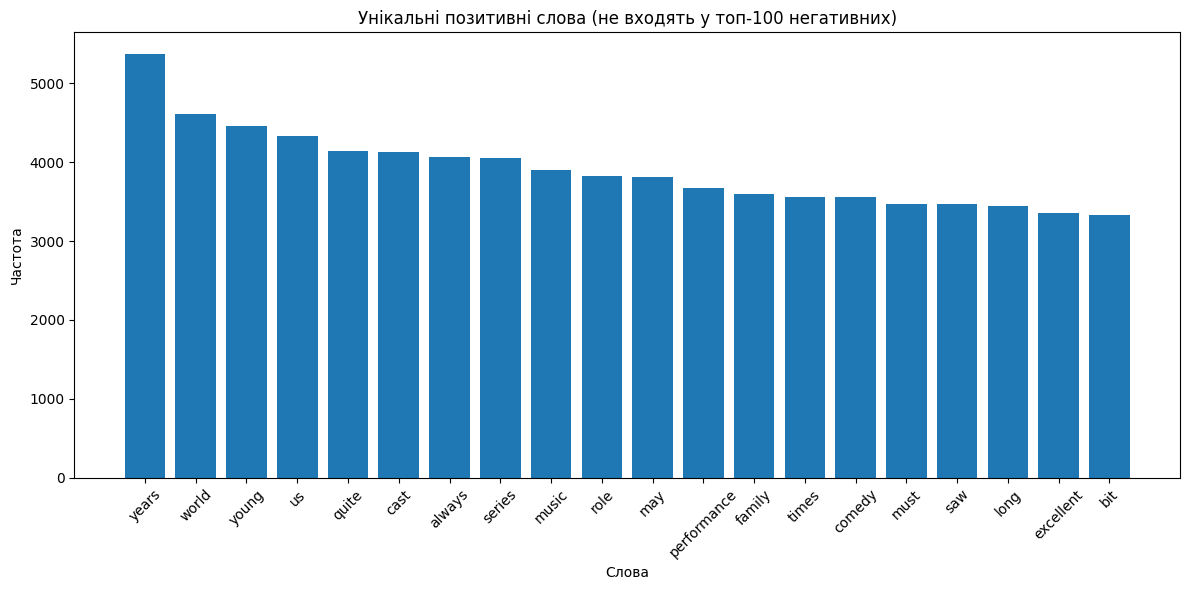

In [72]:
plot_freq(pos_unique_top20, "Унікальні позитивні слова (не входять у топ-100 негативних)")

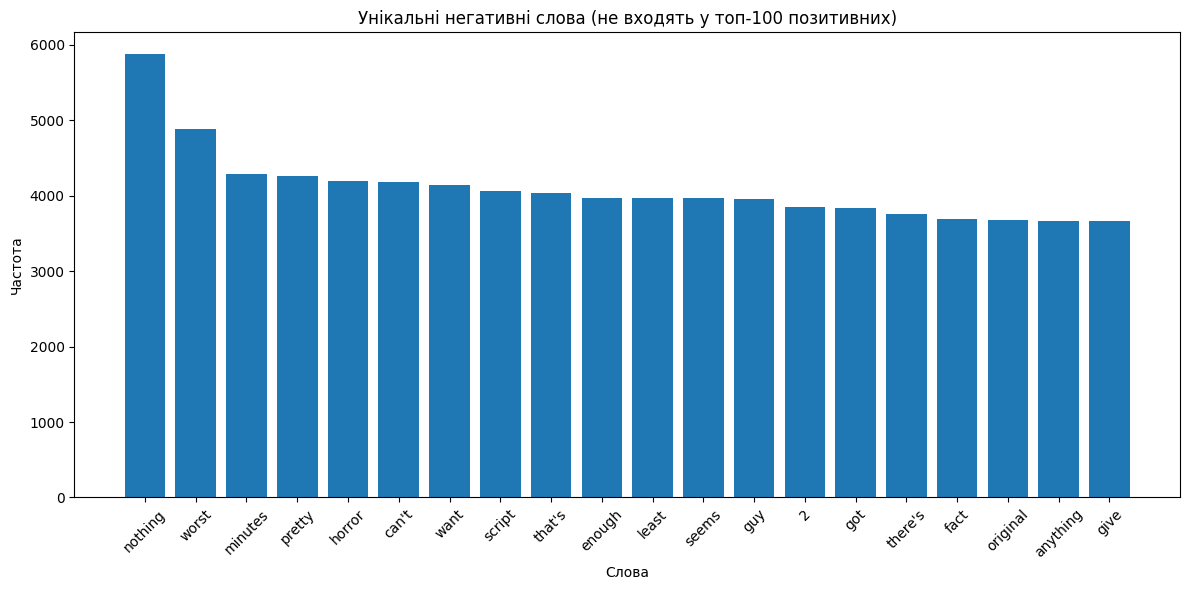

In [74]:
plot_freq(neg_unique_top20, "Унікальні негативні слова (не входять у топ-100 позитивних)")

Далі я вибрав топ слів позитивних і негативних які знаходяться в топі тільки по своєму класу, тут ми уже бачимо більш характерні причини поставити таку оцінку фільму.

## word count distribution

In [81]:
word_counts = data["review_final"].str.split().str.len()

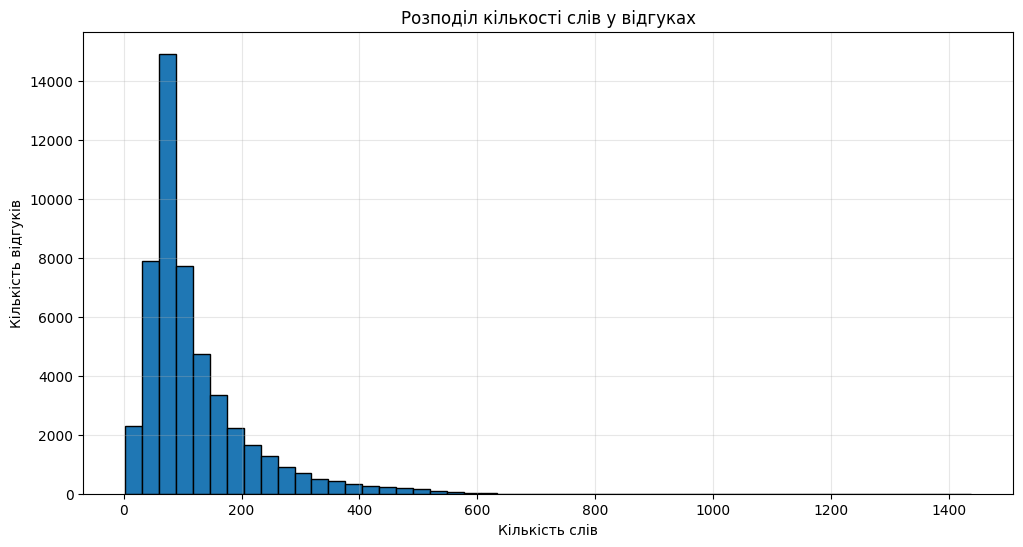

In [82]:
plt.figure(figsize=(12, 6))
plt.hist(word_counts, bins=50, edgecolor='black')
plt.title("Розподіл кількості слів у відгуках")
plt.xlabel("Кількість слів")
plt.ylabel("Кількість відгуків")
plt.grid(alpha=0.3)
plt.show()

З цього графіку стає зрозуміло що краще обмежити кількість слів обрізавши їх до 350-400, оскільки ми не втратимо багато інформації проте зменшимо скадність обчислень значно